## AI Hack - Crop Yield Challenge

**Challenge Description:**

For this challenge, you will be tackling one of the world's most important challenges: modelling crop yields. Climate change is having a big impact in global food security, whilst Earth's population, in particular, in the developing world, continues to grow. Extreme weather events can have significant [impacts](http://www.nature.com/articles/nclimate1832) on crops and there is (significant evidence)[https://www.metoffice.gov.uk/weather/climate/climate-and-extreme-weather] showing that, recently, extreme events have become (1) more extreme and (2) more frequent, making crop yield modelling a useful tool for policy makers and suppliers who are hoping to mitigate these devastating risks.

From a machine learning and statistical perspective, crop yield modelling is a challenging task that can be seen as a **weakly supervised learning** or **multiple instance learning** problem. For every year and census region (e.g. county), we can gather an abundance of features such as daily temperature, vegetation indices and soil moisture, but we only have access to 1 crop yield label. To perform regression, one usually requires the dataset $\{(x_i,y_i)\}_{i=1}^n$. In this case, however, we have $\{(\{x_{ij}\}_{j=1}^{N_i},y_i)\}_{i=1}^n$, where $N_i$ is the number of feature vectors available for label $y_i$. A naive approach would be to reduce to the former by averaging the covariates $\bar{x}_{i}=\sum_{j=1}^{N_i} x_{ij}$, but this may result in an enormous loss of information. 

Could you explore different approaches to modelling crop yields using the provided datasets?

**Data:**

You are provided with various cleaned datasets that are extracted from the State of Illinois, USA. 

- [ ] `IL_yield.csv` contains corn yields for various census counties in Illinois
- [ ] `illinois-counties.geojson` contains the geometries of counties in Illinois
- [ ] `EVI.csv` contains [Enhanced Vegetation Indices](https://en.wikipedia.org/wiki/Enhanced_vegetation_index) for pixels extract from [The Terra Moderate Resolution Imaging Spectroradiometer (MODIS) Vegetation Indices (MOD13Q1)](https://lpdaac.usgs.gov/products/mod13q1v006/) product, aggregated at the resolution of the pixels in the [The Terra and Aqua combined Moderate Resolution Imaging Spectroradiometer (MODIS) Land Cover Climate Modeling Grid (CMG) (MCD12C1)](https://lpdaac.usgs.gov/products/mcd12c1v006/) product that indicate `Majority_Land_Cover_Type_1` is a cropland. The EVI is observed every 16 days.
- `EVI_stacked.csv` is the same as `EVI.csv` except the data is stacked to include the EVI observations for each 16 days in the column.
- `ERA5.csv` contains 2m temperature readings from [ERA5 Renalaysis](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview), "the fifth generation ECMWF reanalysis for the global climate and weather for the past 4 to 7 decades". More information about the variable can be found in the link given.

**Recommended Reading:**
- https://ojs.aaai.org/index.php/AAAI/article/view/11172/11031&hl=en&sa=T&oi=gsb-gga&ct=res&cd=0&d=1880767705414439608&ei=6kgwYPHHCvGTy9YPmJeAsAk&scisig=AAGBfm0LS8pg3jC6MJQQE5-vz3M2kSQeDg
- https://aiforsocialgood.github.io/icml2019/accepted/track1/pdfs/20_aisg_icml2019.pdf
- http://proceedings.mlr.press/v80/ilse18a/ilse18a.pdf
- https://linkinghub.elsevier.com/retrieve/pii/S0034425711002926
- https://linkinghub.elsevier.com/retrieve/pii/S0034425719304791
- https://ieeexplore.ieee.org/document/9173550/
- https://royalsocietypublishing.org/doi/10.1098/rstb.2019.0510 
- http://www.nature.com/articles/nclimate1832
- http://www.nature.com/articles/nature16467
- https://royalsocietypublishing.org/doi/10.1098/rstb.2019.0510

**Suggestions:**

- [ ] It will be useful to make use of `pandas`, `geopandas` and `matplotlib` for data processing and visualisation.
- [ ] Be as creative and rigorous as possible with how you make use of the features.
- [ ] Try and take some time to read through the various papers on the recommended reading list.
- [ ] I recommend only using features between April - November 2015, as suggestioned by one of the papers on the list https://www.sciencedirect.com/science/article/pii/S0034425719304791?via%3Dihub. 


Good luck - we hope that you enjoy this challenge and look forward to seeing your submissions on Devpost!

In [1]:
!ls .

'AI Hack - Crop Yield Challenge.ipynb'	 EVI_stacked.csv
 ERA5.csv				 illinois-counties.geojson
 EVI.csv				 IL_yield.csv


## An illustrative plot

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
gdf = gpd.read_file("illinois-counties.geojson")
df = pd.read_csv("EVI_stacked.csv")

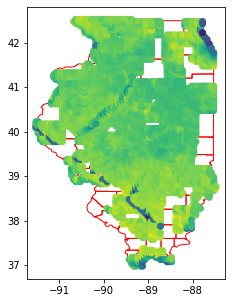

In [15]:
df_plot = df[df["year"]==2019]

fig, ax = plt.subplots(figsize=(5, 5))
gdf.plot(ax=ax, facecolor='none', edgecolor='red')
plt.scatter(df_plot["long"], df_plot["lat"], c=df_plot["evi_1"])